## "likes" Report grade analysis
Having graded all the submissions for the "likes" Report assignment, I have a few questions.
1. How did the class do on this first major assignment?
2. Are there any concerns about the class performance?
3. Is some action needed (like an assignment correction)?

For this analysis, the assignment scores were downloaded from Canvas. The student information was stripped from the data using Excel. In addition, the scores were randomized in Excel after downloading the data. This means that the normally-alphabetical data now has no association with student names or ID number.

### Analysis Plan
To analyze the data, the assignment scores will be loaded into the working environment and converted to a single-column DataFrame object. The univariate distribution will be assessed by plotting a histogram. Outliers will be assessed and descriptive statistics (mean, median, standard deviation) will be calculated before and after any outliers are removed. In addition, a probability plot will show how well the grades match a normal distribution.

### Comparison to SP21
As this is the second semester of this class, we can also compare the grades for this assignment against the grades matching from last semester. The assignment description changed slightly, but the underlying skills remain mostly the same. Have these changes improved the scores?

Because we are in-person (instead of remote) and because the assignment was improved, I expect the grades for FA21 to be higher than the grades in SP21 by at least %5 points.

For reference, the SP21 'likes' Report had 24 submissions, but three zeros. After removing the incomplete submissions, the score mean was 137, variance was 201, and mode was 141.

Including the 0s, the grade univariate distribution can been seen in this first histogram.
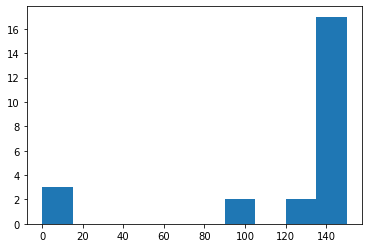

Removing the 0s provides a clearer picture of the "completed assignment" univariate distribution in this second histogram.
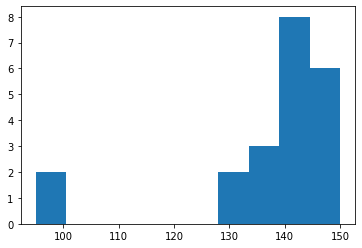

### Setting up the Environment
The following libraries will be used:
- scipy.stats
- pandas
- matplotlib.pyplot

In [1]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

The grade data was exported as a CSV from Blackboard. The pandas library provides the `read_csv()` function to load CSV data as a DataFrame.

In [2]:
filepath = r'C:\Users\dsilva2\EMAT22110_Office\likes_report_grades-anony.csv'
l_grades = pd.read_csv(filepath, header = None)
print(len(l_grades))
l_grades.head()

18


,0
0,121.5
1,145.5
2,150.0
3,127.5
4,109.5


In [3]:
l_grades = l_grades.rename(columns = {0: 'likes_grades'})

### Univariate Distribution
The distribution of the grades is plotted using pyplot's `hist()` function.

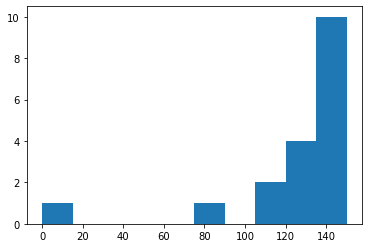

In [4]:
grades_hist = plt.hist(l_grades['likes_grades'])

The maximum points possible for this assignment was 150 points. The defaults for the `hist()` function lack much detail between scores above 120. However, we can see one clear outlier at 0. After going back to Canvas this 0 is accurate (not a mistake in grading or downloading), but fall well outside the norm for the class.

A second DataFrame will help plot the values other than zero and compare the descriptions of the data with and without the 0 score.

In [5]:
l_grades_no_zeros = l_grades.loc[l_grades['likes_grades'] > 0]
print(len(l_grades_no_zeros))
l_grades_no_zeros.head()

17


,likes_grades
0,121.5
1,145.5
2,150.0
3,127.5
4,109.5


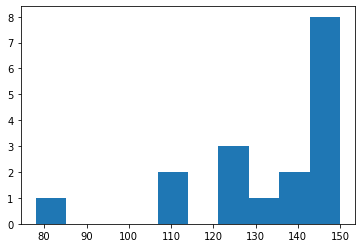

In [6]:
grades_no_zeros_hist = plt.hist(l_grades_no_zeros['likes_grades'])

### Descriptive Statistics
From scipy.stats, the `describe()` function provides the mean, standard deviation, minimum and maximum values, and measures of normality. Also from scipy.stats, `mode()` calculates the mode. The `probplot()` function shows the data against an ideal normal distribution. If the observed values (the blue dots) fit closely with the theoretical probability line (in red), then the data matches a normal distribution. Deviations from the probability line show how the data is different from normal.
We will compute these for both the full data and for the data without the zero values.

`describe()` returns a DescribeResult object, from which we can call the specific stats of interest.

`mode()` returns a similar object called ModeResults. Calling `.mode[0]` returns just the value of the mode.

In [7]:
type(stats.describe(l_grades['likes_grades']))

scipy.stats.stats.DescribeResult

In [8]:
type(stats.mode(l_grades['likes_grades']))

scipy.stats.stats.ModeResult

#### Description of the full data
The number of observations is:

In [9]:
stats.describe(l_grades['likes_grades']).nobs

18

The mean is:

In [10]:
stats.describe(l_grades['likes_grades']).mean

126.0

The variance is:

In [11]:
stats.describe(l_grades['likes_grades']).variance

1355.0294117647059

The minimum and maximum values are:

In [12]:
stats.describe(l_grades['likes_grades']).minmax

(0.0, 150.0)

The mode is:

In [13]:
stats.mode(l_grades['likes_grades']).mode[0]

150.0

The quantile ranges are:

In [14]:
stats.mstats.mquantiles(l_grades['likes_grades'])

array([120.975, 139.5  , 150.   ])

Plotting the probability of the scores shows large deviations from a normal distribution, especially at the lower tail.

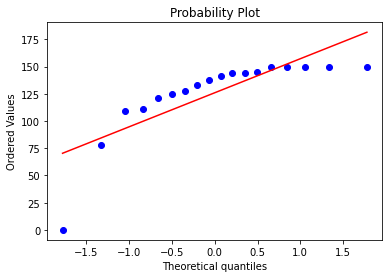

In [15]:
ax1 = plt.subplot()
res = stats.probplot(l_grades['likes_grades'], plot = plt)
plt.show()

#### Description of the data without zeros
The number of observations is:

In [16]:
stats.describe(l_grades_no_zeros['likes_grades']).nobs

17

The mean is:

In [17]:
stats.describe(l_grades_no_zeros['likes_grades']).mean

133.41176470588235

The variance is:

In [18]:
stats.describe(l_grades_no_zeros['likes_grades']).variance

389.10110294117646

The minimum and maximum values are:

In [19]:
stats.describe(l_grades_no_zeros['likes_grades']).minmax

(78.0, 150.0)

The mode is:

In [20]:
stats.mode(l_grades_no_zeros['likes_grades']).mode[0]

150.0

The quantile ranges are:

In [21]:
stats.mstats.mquantiles(l_grades_no_zeros['likes_grades'])

array([123.6, 141. , 150. ])

Plotting the probability of the scores still shows large deviations from a normal distribution, especially at the lower tail. However, it is closer to normal.

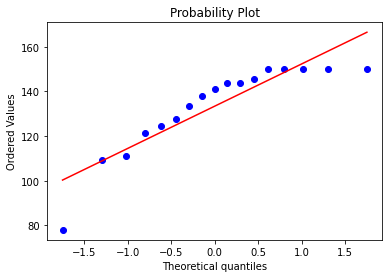

In [22]:
ax2 = plt.subplot()
res = stats.probplot(l_grades_no_zeros['likes_grades'], plot = plt)
plt.show()

### Conclusions
Depending on how we treat the zeros in the data set, we get slightly different views of the class performance on this first assignment. The average percentage with the zeros included is an 84%, that is a B.

In [23]:
stats.describe(l_grades['likes_grades']).mean/150*100

84.0

This is about what I plan for in this type of assignment. In general, I aim to create assignments that have about a B average, with plenty of students able to score in the A- to A range.

When we remove the zeros from the data set, we get a slightly higher average percentage of 88.9%, or an A-.

In [24]:
stats.describe(l_grades_no_zeros['likes_grades']).mean/150*100

88.94117647058823

We do see that the the most frequent score (the mode) is the same whether we include the zeros or not. It is 100%, that is a perfect score on the assignment.

Modal percentage including zeros:

In [25]:
stats.mode(l_grades['likes_grades']).mode[0]/150*100

100.0

Modal percentage not excluding zeros:

In [26]:
stats.mode(l_grades_no_zeros['likes_grades']).mode[0]/150*100

100.0

### Was my hypothesis correct?
I predicted that the scores this semester would be at least 5% higher than the scores last semester. It turns out, this hypothesis is either supported or rejected depending on how we treat the data.

On one hand, there are two fewer zero scores than last semester. This means the raw average from this semester is 84% compared to SP21's 80%. This is an improvement of just below the 5% prediction!

On the other hand, removing the zeros makes the average grade for this semester 88.9%, which is lower than in SP21 average of 91%, but only slightly.

A final comparison is the mode. In SP21, the most frequent score was 141pts (94%). This semester, the mode was a perfect 150pts (100%). This is a 6% increase in the mode, a greater improvement than hypothesized.

IF the data were normally distributed, we could test for differences using a t-test, but the data is not normal. Below are those t-tests run anyway to showcase the difficulty in applying a t-test to non-normally distributed data. Notice the standard deviation is quite large, which means both results are non-significant. 

In [27]:
import numpy as np

Test including 0s.

In [28]:
stats.ttest_ind_from_stats(mean1=120, std1=np.sqrt(2327), nobs1=24,
                     mean2=126, std2=np.sqrt(1355), nobs2=18)

Ttest_indResult(statistic=-0.43985431559619165, pvalue=0.6624101548164365)

Test removing 0s.

In [29]:
stats.ttest_ind_from_stats(mean1=137, std1=np.sqrt(201), nobs1=21,
                     mean2=133, std2=np.sqrt(389), nobs2=17)

Ttest_indResult(statistic=0.7268064396037073, pvalue=0.47204448127614396)

It is clear that many people were successful with this assignment, in fact most people did just very well. However, there were a handful of students that underperformed. In this case, I consider under performance as falling below the lower second quantile without considering the zero scores. This cutoff value for this quantile is 123. Five students fall at or below this cutoff.

In [30]:
print(l_grades.loc[l_grades['likes_grades'] <= 123].size)
l_grades.loc[l_grades['likes_grades'] <= 123]

5


,likes_grades
0,121.5
4,109.5
11,78.0
12,111.0
17,0.0


So, how do we provide a fair way to reward those who met the assignment goals while allowing for grace in this first major assignment?

__Here's a proposal__: <br>
For all students, I will allow the option (not required) to resubmit the "likes" Report for up to half credit back on the missed points. So, someone who earned a 0 can improve their score up to 75 points, a 50%. Someone how earned a 137 can improve their score by up to 6.5 points $(150-137)/2 = 6.5$, a 95.6%. If everyone took advantage of this, what would the normal distribution look like?

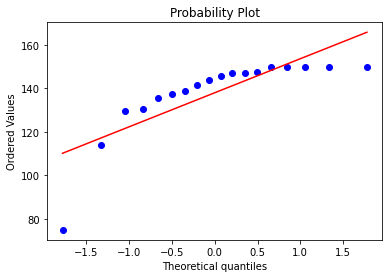

In [31]:
ax3 = plt.subplot()
res = stats.probplot(((150-l_grades['likes_grades'])/2)+l_grades['likes_grades'], plot = plt)
plt.show()

This slightly improves the distribution of scores, but we still see as large of deviations at the lower tail. Those who didn't submit an assignment earn up to 75pts. But everyone else moves into a nearly-normal distribution (with scores truncated at 150pts).

For me, this is a fair solution. It still requires more work for those who did not do well on the first assignment. Those with less to fix can earn back some points with minimal effort. And those who already earned an A on the assignment can focus on other things.